In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('C:/Users/Incredible-PC/Documents/encoded_dataset1.csv')
df.head()

,Branch,Semester,Adaptability,TimeManagement,Curiosity,Integration,Versatality,Scheduling,Efficiency,Multitasking,...,Empathy,Resilience,Feedback,SelfCare,Resourcefulness,FinancialConstraint,Wellness,Stability,Hardship,Result
0,Mca,3,1,1,2,2,1,1,1,1,...,2,2,1,2,2,2,1,2,1,42
1,Int.Mca,9,3,3,1,1,0,1,0,2,...,1,1,1,2,1,1,3,1,1,34
2,Int.Mca,9,2,2,1,0,0,0,0,2,...,0,0,2,1,1,2,2,2,0,25
3,Int.Mca,9,2,1,3,2,1,0,2,0,...,0,2,2,0,3,3,0,0,1,31
4,Int.Mca,9,3,3,3,1,3,1,2,1,...,2,1,1,1,1,1,1,1,0,40


In [11]:
# Define the conditions
condition_graduate = (df['Result'] >= 55)  # Assuming 70 or above is considered as passing for "Graduate"
condition_fail = (df['Result'] > 30) & (df['Result'] < 55)  # Assuming between 50 and 69 is "Fail but not Dropout"
condition_dropout = (df['Result'] <= 30)  # Assuming below 50 is "Dropout"

# Assign labels based on conditions
df['Result_new'] = 'Undetermined'  # Create a new column for the labels, initialized as 'Undetermined'

df.loc[condition_graduate, 'Result_new'] = 'Graduate'
df.loc[condition_fail, 'Result_new'] = 'Fail but not Dropout'
df.loc[condition_dropout, 'Result_new'] = 'Dropout'

# 'Result' column will now contain the labels based on the conditions

In [12]:
df.head()

,Branch,Semester,Adaptability,TimeManagement,Curiosity,Integration,Versatality,Scheduling,Efficiency,Multitasking,...,Resilience,Feedback,SelfCare,Resourcefulness,FinancialConstraint,Wellness,Stability,Hardship,Result,Result_new
0,Mca,3,1,1,2,2,1,1,1,1,...,2,1,2,2,2,1,2,1,42,Fail but not Dropout
1,Int.Mca,9,3,3,1,1,0,1,0,2,...,1,1,2,1,1,3,1,1,34,Fail but not Dropout
2,Int.Mca,9,2,2,1,0,0,0,0,2,...,0,2,1,1,2,2,2,0,25,Dropout
3,Int.Mca,9,2,1,3,2,1,0,2,0,...,2,2,0,3,3,0,0,1,31,Fail but not Dropout
4,Int.Mca,9,3,3,3,1,3,1,2,1,...,1,1,1,1,1,1,1,0,40,Fail but not Dropout


In [13]:
df.columns

Index(['Branch', 'Semester', 'Adaptability', 'TimeManagement', 'Curiosity',
       'Integration', 'Versatality', 'Scheduling', 'Efficiency',
       'Multitasking', 'Consistency', 'Participation', 'ExtraActivities',
       'Engagement', 'Collaboration', 'Balance', 'Cooperation',
       'ConflictResolution', 'Synergy', 'Empathy', 'Resilience', 'Feedback',
       'SelfCare', 'Resourcefulness', 'FinancialConstraint', 'Wellness',
       'Stability', 'Hardship', 'Result', 'Result_new'],
      dtype='object')

In [14]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame and 'Result' is the column to label encode
# Replace 'df' and 'Result' with your actual DataFrame and column names

label_encoder = LabelEncoder()
df['Result_Encoded'] = label_encoder.fit_transform(df['Result_new'])

# 'Result_Encoded' column will now contain the encoded labels for 'Result'
# The original 'Result' column will remain unchanged


In [15]:
col = ['Result', 'Result_new']
df.drop(columns=col , inplace=True)

Feature: Semester, F-score: 0.9353314525627894, p-value: 0.3941740938956012
Feature: Adaptability, F-score: 14.353254393729753, p-value: 1.5032262597741334e-06
Feature: TimeManagement, F-score: 35.92770978898875, p-value: 4.7697638938593386e-14
Feature: Curiosity, F-score: 33.84922010836668, p-value: 2.2225102246206488e-13
Feature: Integration, F-score: 24.771407284269042, p-value: 2.4743463970527264e-10
Feature: Versatality, F-score: 28.8305498467187, p-value: 1.0105459278119535e-11
Feature: Scheduling, F-score: 44.60245804961168, p-value: 9.899045866314901e-17
Feature: Efficiency, F-score: 26.41851308571715, p-value: 6.675482497260511e-11
Feature: Multitasking, F-score: 27.279342113009708, p-value: 3.388998700033567e-11
Feature: Consistency, F-score: 52.15396653475439, p-value: 6.143926861738187e-19
Feature: Participation, F-score: 23.346175941123473, p-value: 7.796741955220347e-10
Feature: ExtraActivities, F-score: 24.197981637370763, p-value: 3.920274741551937e-10
Feature: Engageme

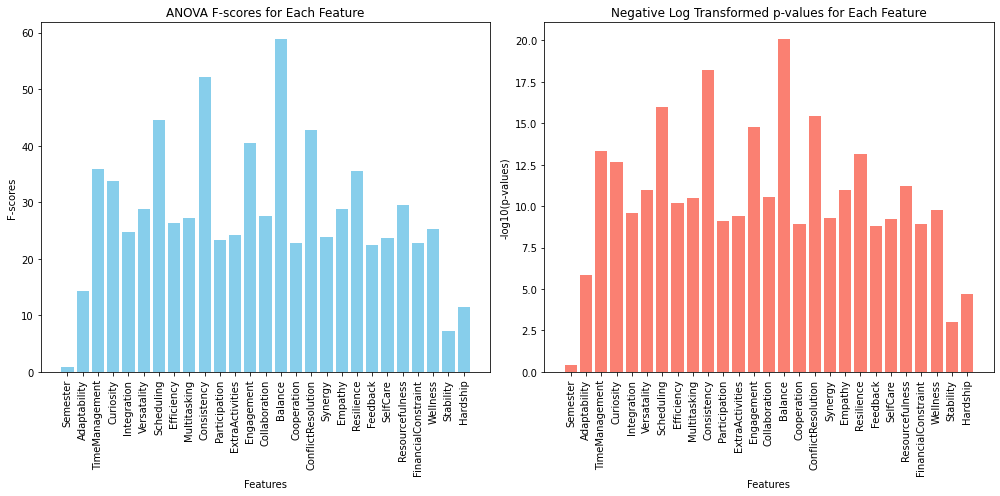

In [16]:
from sklearn.feature_selection import f_classif


# Assuming 'data' is your DataFrame containing the columns
# Replace the column names as per your dataset
columns_for_anova = ['Branch', 'Semester', 'Adaptability', 'TimeManagement', 'Curiosity',
                     'Integration', 'Versatality', 'Scheduling', 'Efficiency',
                     'Multitasking', 'Consistency', 'Participation', 'ExtraActivities',
                     'Engagement', 'Collaboration', 'Balance', 'Cooperation',
                     'ConflictResolution', 'Synergy', 'Empathy', 'Resilience', 'Feedback',
                     'SelfCare', 'Resourcefulness', 'FinancialConstraint', 'Wellness',
                     'Stability', 'Hardship', 'Result_Encoded']

# Select columns for ANOVA from the dataset
X_anova = df[columns_for_anova]

# Compute variance
variances = X_anova.var()

# Filter columns with non-zero variance
non_constant_columns = variances[variances != 0].index
X_anova_filtered = X_anova[non_constant_columns]

# Separate the features and the target variable
X = X_anova_filtered.drop('Result_Encoded', axis=1)  # Features
y = X_anova_filtered['Result_Encoded']  # Target variable

# Perform ANOVA F-test
f_scores, p_values = f_classif(X, y)

# Print F-scores and p-values for each feature
for i, col in enumerate(X.columns):
    print(f"Feature: {col}, F-score: {f_scores[i]}, p-value: {p_values[i]}")
    
    
plt.figure(figsize=(14, 7))   
plt.subplot(1, 2, 1)
plt.bar(range(len(f_scores)), f_scores, color='skyblue')
plt.xlabel('Features')
plt.ylabel('F-scores')
plt.title('ANOVA F-scores for Each Feature')
plt.xticks(range(len(f_scores)), X.columns, rotation=90)
plt.tight_layout()

# Plot p-values
plt.subplot(1, 2, 2)
plt.bar(range(len(p_values)), -1 * np.log10(p_values), color='salmon')  # Negative log transformation for better visualization
plt.xlabel('Features')
plt.ylabel('-log10(p-values)')
plt.title('Negative Log Transformed p-values for Each Feature')
plt.xticks(range(len(p_values)), X.columns, rotation=90)
plt.tight_layout()

plt.show()

In [17]:
# Choose a significance level (e.g., 0.001)
significance_level = 0.01

# Filter significant features based on p-values
significant_features = [X.columns[i] for i, p_value in enumerate(p_values) if p_value < significance_level]

# Print significant features
print("Significant Features:")
print(significant_features)

Significant Features:
['Adaptability', 'TimeManagement', 'Curiosity', 'Integration', 'Versatality', 'Scheduling', 'Efficiency', 'Multitasking', 'Consistency', 'Participation', 'ExtraActivities', 'Engagement', 'Collaboration', 'Balance', 'Cooperation', 'ConflictResolution', 'Synergy', 'Empathy', 'Resilience', 'Feedback', 'SelfCare', 'Resourcefulness', 'FinancialConstraint', 'Wellness', 'Stability', 'Hardship']


In [18]:
data_filtered =df[significant_features + ['Result_Encoded']]

# Separate the features and the target variable
X_significant = data_filtered.drop('Result_Encoded', axis=1)  # Significant features
y_significant = data_filtered['Result_Encoded']  # Target variable

## LINEAR REGRESSION

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Assuming 'X_significant' contains significant features and 'y_significant' is the target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_significant, y_significant, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model with increased iterations and a different solver
model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
lr_accuracy = model.score(X_test_scaled, y_test)
print(f"Model Accuracy: {lr_accuracy}")


Model Accuracy: 0.9344262295081968


## NAIVE BAYES

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

# Assuming 'X_significant' contains significant features and 'y_significant' is the target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_significant, y_significant, test_size=0.3, random_state=20)

# Scale the features (NB doesn't necessarily require scaling, but for consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Evaluate the Naive Bayes model on the test set
nb_accuracy = nb_model.score(X_test_scaled, y_test)
print(f"Naive Bayes Model Accuracy on Test Set: {nb_accuracy}")

# Perform cross-validation to estimate model performance
cv_scores = cross_val_score(nb_model, X_train_scaled, y_train, cv=5)  # 5-fold cross-validation
print("Cross-validation Scores:", cv_scores)
print("Mean Accuracy from Cross-validation:", cv_scores.mean())


Naive Bayes Model Accuracy on Test Set: 0.8852459016393442
Cross-validation Scores: [0.89655172 0.96428571 1.         0.92857143 1.        ]
Mean Accuracy from Cross-validation: 0.9578817733990148


## RANDOM FOREST REGRESSOR 

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Splitting the significant features and target variable into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_significant, y, test_size=0.3, random_state=42)

# Initializing and fitting the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf.predict(X_test)

# Calculating R^2 score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score on Test Set: {r2}")


R^2 Score on Test Set: 0.8617616455696203


## RANDOM FOREST CLASSIFIER

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Splitting the significant features and target variable into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_significant, y, test_size=0.3, random_state=42)

# Initializing and fitting the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculating accuracy score
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {rf_accuracy}")


Accuracy on Test Set: 0.9672131147540983


## SVM

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Splitting the significant features and target variable into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_significant, y, test_size=0.3, random_state=42)

# Initializing and fitting the SVM Classifier with regularization (C=0.1 as an example)
svm_classifier = SVC(C=0.1, random_state=42)
svm_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculating accuracy score
svm_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {svm_accuracy}")


Accuracy on Test Set: 0.7704918032786885


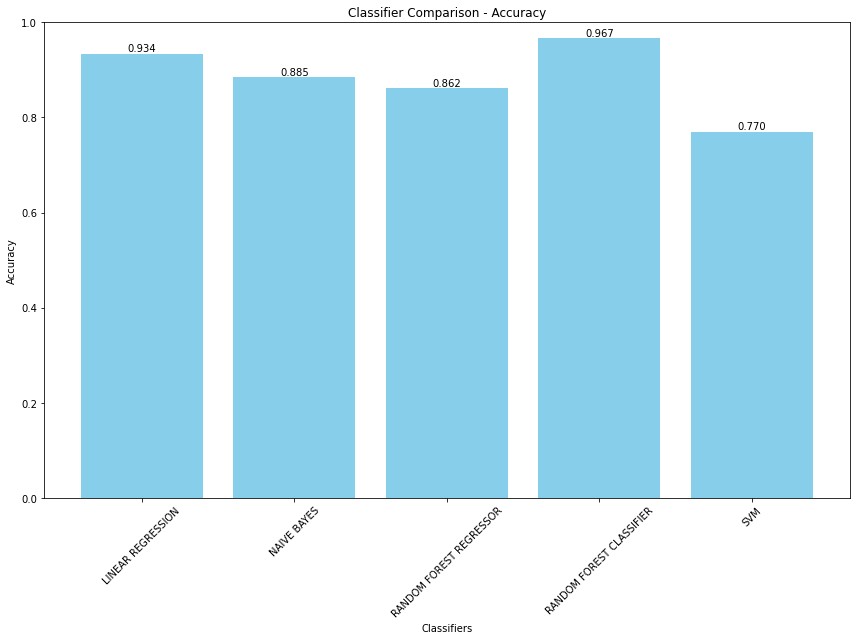

In [24]:
import matplotlib.pyplot as plt

# Sample classifier names and accuracy scores (replace with your actual data)
classifier_names = ['LINEAR REGRESSION', 'NAIVE BAYES','RANDOM FOREST REGRESSOR','RANDOM FOREST CLASSIFIER','SVM']
accuracy_scores = [lr_accuracy , nb_accuracy , r2 , rf_accuracy , svm_accuracy]

# Plotting the bar graph
plt.figure(figsize=(12, 9))
plt.bar(classifier_names, accuracy_scores, color='skyblue')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Comparison - Accuracy')

# Displaying accuracy values on the bars
for i, acc in enumerate(accuracy_scores):
    plt.text(i, acc, f'{acc:.3f}', ha='center', va='bottom')

plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 for accuracy values
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.subplots_adjust(left=0.1, right=0.9, top=2, bottom=0.3)
plt.tight_layout()
plt.show()


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# Assuming X_significant and y are your significant features and target variable
# Replace this with your actual data

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Perform k-fold cross-validation
# Change cv parameter to the desired number of folds (e.g., cv=5 for 5-fold cross-validation)
cv_scores = cross_val_score(rf, X_significant, y, cv=10, scoring='r2')

# Print R^2 scores for each fold
print("R^2 Scores for each fold:", cv_scores)

# Calculate the mean R^2 score
mean_r2 = np.mean(cv_scores)
print(f"Mean R^2 Score: {mean_r2}")


R^2 Scores for each fold: [0.96141727 0.93433125 0.95856667 0.95584375 0.99167742 0.95167308
 0.93369231 0.96123333 0.974375   0.9958871 ]
Mean R^2 Score: 0.961869717347169


In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Assuming X_significant and y are your significant features and target variable
# Replace this with your actual data

# Initialize the SVM Classifier
svm_classifier = SVC(C=0.1, random_state=42)

# Initialize KFold with the desired number of folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
svm_cv_scores = cross_val_score(svm_classifier, X_significant, y, cv=kf, scoring='accuracy')

# Print accuracy scores for each fold
print("Accuracy Scores for each fold:", svm_cv_scores)

# Calculate the mean accuracy score
mean_accuracy = svm_cv_scores.mean()
print(f"Mean Accuracy: {mean_accuracy}")


Accuracy Scores for each fold: [0.80487805 0.80487805 0.725      0.55       0.725     ]
Mean Accuracy: 0.7219512195121951


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Assuming X_significant and y are your significant features and target variable
# Replace this with your actual data

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize KFold with the desired number of folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
rf_cv_scores = cross_val_score(rf_classifier, X_significant, y, cv=kf, scoring='accuracy')

# Print accuracy scores for each fold
print("Accuracy Scores for each fold:", rf_cv_scores)

# Calculate the mean accuracy score
mean_accuracy = rf_cv_scores.mean()
print(f"Mean Accuracy: {mean_accuracy}")


Accuracy Scores for each fold: [0.95121951 1.         0.95       1.         0.95      ]
Mean Accuracy: 0.9702439024390245


In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Generate synthetic data for demonstration
X_significant, y_significant = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_significant)

# Initialize the Logistic Regression model
model = LogisticRegression(solver='liblinear', max_iter=1000)

# Perform cross-validation
cv_scores = cross_val_score(model, X_scaled, y_significant, cv=5)  # Use 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print(f"Mean Accuracy: {cv_scores.mean():.4f}")


Cross-validation scores: [0.9   0.885 0.875 0.83  0.845]
Mean Accuracy: 0.8670


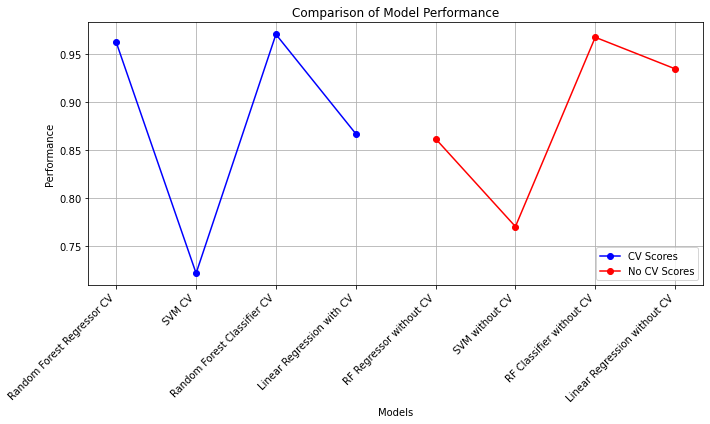

In [32]:
import matplotlib.pyplot as plt

# Provided data for cross-validated scores and scores without cross-validation
cv_models = [
    'Random Forest Regressor CV',
    'SVM CV',
    'Random Forest Classifier CV',
    'Linear Regression with CV'
]
cv_scores = [
    0.961869717347169,
    0.7219512195121951,
    0.9702439024390245,
    0.8670
]

no_cv_models = [
    'RF Regressor without CV',
    'SVM without CV',
    'RF Classifier without CV',
    'Linear Regression without CV'
]
no_cv_scores = [
    0.8617616455696203,
    0.7704918032786885,
    0.9672131147540983,
    0.9344262295081968
]

# Creating line graphs for cross-validated and non cross-validated scores
plt.figure(figsize=(10, 6))

plt.plot(cv_models, cv_scores, marker='o', linestyle='-', color='b', label='CV Scores')
plt.plot(no_cv_models, no_cv_scores, marker='o', linestyle='-', color='r', label='No CV Scores')

plt.title('Comparison of Model Performance')
plt.xlabel('Models')
plt.ylabel('Performance')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
